<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/DL/Assignments/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

# Indest Data

In [3]:
df = pd.read_csv("/content/Frozen_Dessert_Production.csv", parse_dates=True, index_col="DATE")
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [5]:
df.columns

Index(['IPN31152N'], dtype='object')

In [6]:
df=df.rename(columns = {'IPN31152N':'Production'})


In [7]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Production,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [11]:
df.columns = ["Production"]



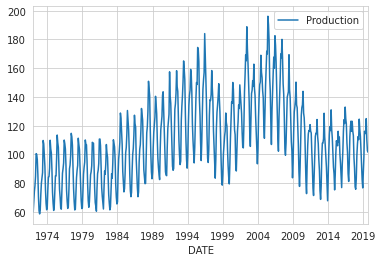

In [12]:
df.plot();

# Preprocessing of Data

## Train Test Split

In [13]:
len(df)

573

In [17]:
test_percent = 0.1

In [18]:
len(df)*test_percent

57.300000000000004

In [19]:
test_point = np.round(len(df)*test_percent)
test_point

57.0

In [20]:
test_ind = int(len(df) - test_point)
test_ind

516

In [21]:
train = df.iloc[-test_ind:]
test = df.iloc[:-test_ind]

In [22]:
train.shape, test.shape

((516, 1), (57, 1))

In [23]:
train

,Production
DATE,
1976-10-01,75.103
1976-11-01,67.532
1976-12-01,62.483
1977-01-01,63.768
1977-02-01,75.061
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [24]:
test

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


## Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler 

In [26]:
scaler = MinMaxScaler()

In [27]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
length = 12 
batch_size = 1 
stride = 1 
generator = TimeseriesGenerator(data = train_scaled,
                                 targets = train_scaled, 
                                length = length,
                               batch_size = batch_size,
                               stride = stride)

In [31]:
len(train_scaled)

516

In [32]:
len(generator) 

504

In [33]:
generator

In [34]:
generator[0]

(array([[[0.10724401],
         [0.05141353],
         [0.01418289],
         [0.02366126],
         [0.10693357],
         [0.21724511],
         [0.23673718],
         [0.28433917],
         [0.39939357],
         [0.3817457 ],
         [0.33812192],
         [0.2297851 ]]]), array([[0.11403608]]))

In [35]:
# First batch 
X, y = generator[0]

In [36]:
print(f'Given the Array: \n{X}')    
print(f'Predict this y: \n{y}')



Given the Array: 
[[[0.10724401]
  [0.05141353]
  [0.01418289]
  [0.02366126]
  [0.10693357]
  [0.21724511]
  [0.23673718]
  [0.28433917]
  [0.39939357]
  [0.3817457 ]
  [0.33812192]
  [0.2297851 ]]]
Predict this y: 
[[0.11403608]]


In [37]:
train_scaled[:10]

array([[0.10724401],
       [0.05141353],
       [0.01418289],
       [0.02366126],
       [0.10693357],
       [0.21724511],
       [0.23673718],
       [0.28433917],
       [0.39939357],
       [0.3817457 ]])

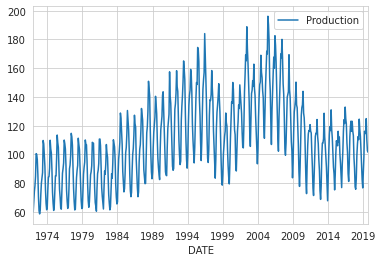

In [38]:
df.plot()

The more length the more training time

# Modelling & Model Performance

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [41]:
n_features = 1

## modeling

---



In [50]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [52]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [53]:
model.fit_generator(generator, epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/30
504/504 [==============================] - 16s 30ms/step - loss: 0.0254 - val_loss: 0.0086
Epoch 2/30
504/504 [==============================] - 16s 32ms/step - loss: 0.0172 - val_loss: 0.0050
Epoch 3/30
504/504 [==============================] - 15s 29ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 4/30
504/504 [==============================] - 13s 26ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 5/30
504/504 [==============================] - 14s 27ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 6/30
504/504 [==============================] - 11s 23ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 7/30
504/504 [==============================] - 18s 36ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 8/30
504/504 [==============================] - 11s 21ms/step - loss: 0.0052 - val_loss: 0.0011
Epoch 9/30
504/504 [==============================] - 11s 21ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 10/30
504/504 [==============================] - 11s 21ms/step - loss: 0.004

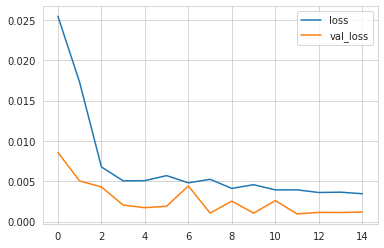

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [57]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

### Inverse Transformation and Comparing

In [58]:
true_predictions = scaler.inverse_transform(test_predictions)

In [59]:
test['Predictions'] = true_predictions
test

,Production,Predictions
DATE,,
1972-01-01,59.962,91.514
1972-02-01,67.061,85.189
1972-03-01,74.235,82.960
1972-04-01,78.112,88.302
1972-05-01,84.764,98.469
1972-06-01,100.596,107.891
1972-07-01,100.126,113.711
1972-08-01,96.361,118.352
1972-09-01,85.801,119.737


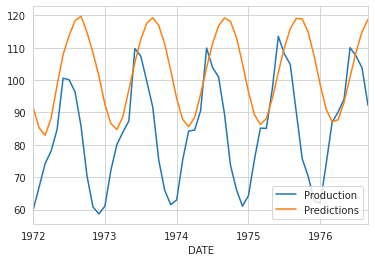

In [60]:
test.plot()

In [61]:
eval_metrics(test['Production'], test['Predictions'])

r2_score: -1.4952578866684396 
mae: 19.898142399103055 
mse: 646.2402778127675 
rmse: 25.421256416880098


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [62]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [63]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [64]:
model = Sequential()
model.add(LSTM(150, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 13s 21ms/step - loss: 0.0196
Epoch 2/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0068
Epoch 3/15
561/561 [==============================] - 12s 21ms/step - loss: 0.0062
Epoch 4/15
561/561 [==============================] - 13s 23ms/step - loss: 0.0055
Epoch 5/15
561/561 [==============================] - 15s 26ms/step - loss: 0.0039
Epoch 6/15
561/561 [==============================] - 17s 30ms/step - loss: 0.0041
Epoch 7/15
561/561 [==============================] - 12s 21ms/step - loss: 0.0036
Epoch 8/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0033
Epoch 9/15
561/561 [==============================] - 12s 21ms/step - loss: 0.0032
Epoch 10/15
561/561 [==============================] - 12s 21ms/step - loss: 0.0031
Epoch 11/15
561/561 [==============================] - 12s 21ms/step - loss: 0.0029
Epoch 12/15
561/561 [==============================] - 12s 21ms/step - loss: 0.0030
E

In [65]:
forecast = []
periods = 24

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred) 
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [66]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 91.10603216],
       [ 85.13629987],
       [ 83.86140673],
       [ 90.65737045],
       [ 98.73071896],
       [105.80454775],
       [110.36321074],
       [113.82491473],
       [116.01593895],
       [113.34873163],
       [107.1838055 ],
       [ 98.79530801],
       [ 89.58456009],
       [ 83.82200301],
       [ 83.6429635 ],
       [ 89.87150061],
       [ 96.95014095],
       [103.01724384],
       [107.74837871],
       [111.25557916],
       [113.15540097],
       [112.25182112],
       [106.83477161],
       [ 97.58373283]])

In [67]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [68]:
forecast_index = pd.date_range(start = '2019-01-01', periods = periods, freq = 'MS')
forecast_index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [69]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-01-01,91.106
2019-02-01,85.136
2019-03-01,83.861
2019-04-01,90.657
2019-05-01,98.731
2019-06-01,105.805
2019-07-01,110.363
2019-08-01,113.825
2019-09-01,116.016
2019-10-01,113.349


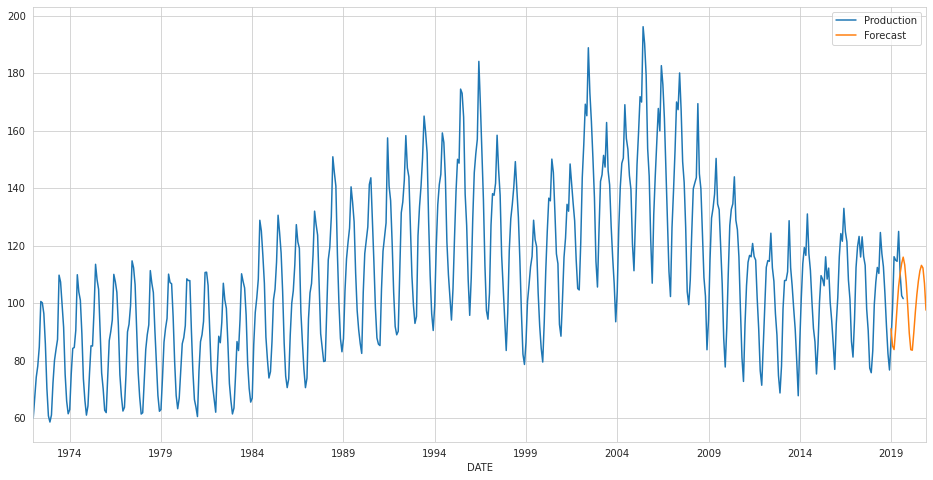

In [70]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

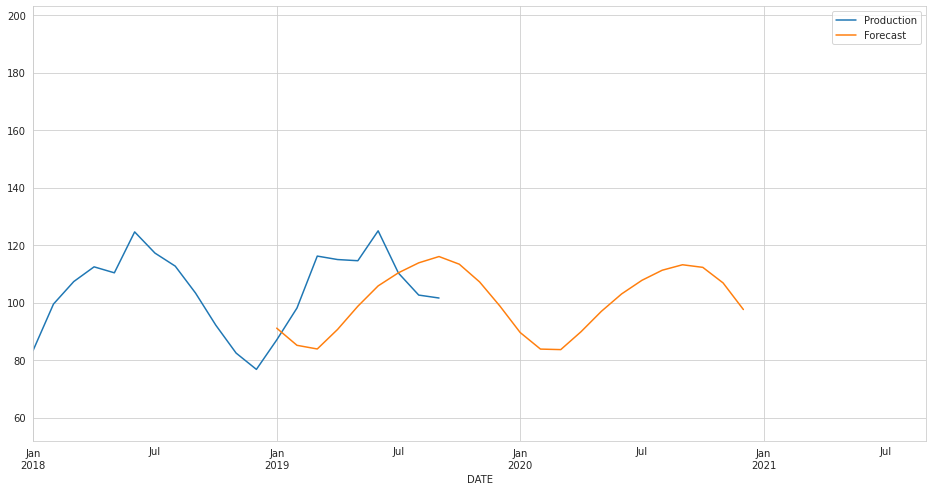

In [73]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___